<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/DL_Ass_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=25, face='Times New Roman'>🛠 Step 1: **Setup** and **Import** Packeges</font>#

In [ ]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# torchvision for MNIST dataset and transforms
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Data handling
from torch.utils.data import DataLoader, random_split
# Visualization
import matplotlib.pyplot as plt
import numpy as np
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <font size=25, face='Times New Roman'>🛠 Step 2: Load and Preprocess MNIST</font>

In [ ]:
# Transform: convert images to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
full_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split: 80% train, 20% validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Load test data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.35MB/s]


# <font size=25, color=green face='Times New Roman'>➡️ Part A: Deep Network
</font>

# <font size=15, face='Times New Roman'>🛠 Step 3: Define Deep Network </font>

In [ ]:
import torch.nn as nn

class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.ReLU(),

            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.network(x)


# <font size=15, face='Times New Roman'>🛠 Step 4: Train Deep Network </font>

In [ ]:
# Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}") # Print the device being used
deep_model = DeepNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(deep_model.parameters(), lr=0.001)

train_losses = []
val_losses = []
epochs = 10

for epoch in range(epochs):
    deep_model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = deep_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Validation
    deep_model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = deep_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")


Using device: cpu
Epoch 1/10, Train Loss: 0.2746, Val Loss: 0.1199
Epoch 2/10, Train Loss: 0.1392, Val Loss: 0.1098
Epoch 3/10, Train Loss: 0.1096, Val Loss: 0.0854
Epoch 4/10, Train Loss: 0.0942, Val Loss: 0.0755
Epoch 5/10, Train Loss: 0.0804, Val Loss: 0.0758
Epoch 6/10, Train Loss: 0.0741, Val Loss: 0.0784
Epoch 7/10, Train Loss: 0.0686, Val Loss: 0.0651
Epoch 8/10, Train Loss: 0.0637, Val Loss: 0.0653
Epoch 9/10, Train Loss: 0.0550, Val Loss: 0.0687
Epoch 10/10, Train Loss: 0.0529, Val Loss: 0.0702


# <font size=15, face='Times New Roman'>🛠 Step 5: Plot Loss Curves </font>

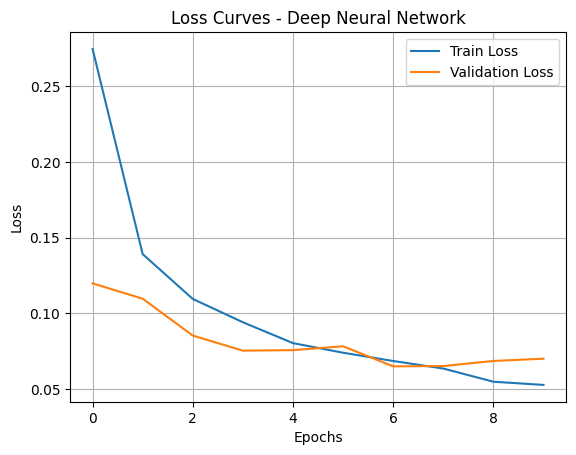

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curves - Deep Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# <font face='Times New Roman'>Display Grid of Sample Images with Labels (for Deep Network) </font>

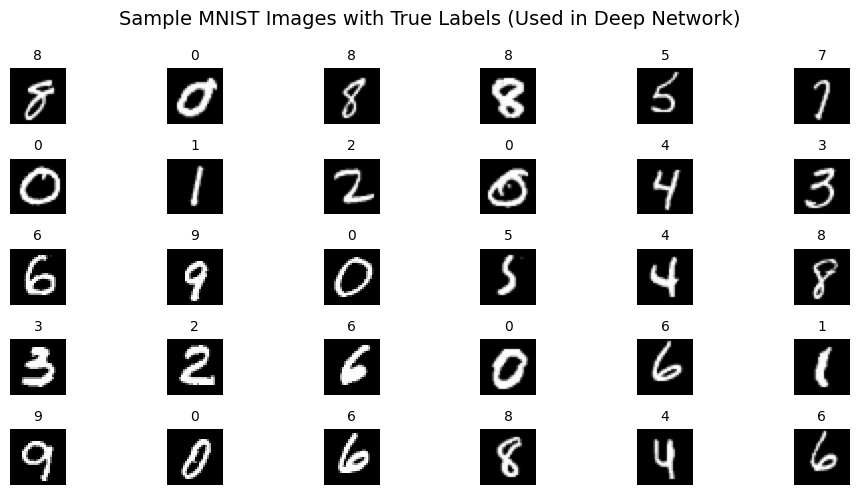

In [ ]:
# Display Sample Images for Deep Network (same as before)
import matplotlib.pyplot as plt

# Get a batch from train_loader
images, labels = next(iter(train_loader))

# Plot a 5x6 grid (30 images)
fig, axes = plt.subplots(5, 6, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(str(labels[i].item()), fontsize=10)
    ax.axis('off')

plt.suptitle("Sample MNIST Images with True Labels (Used in Deep Network)", fontsize=14)
plt.tight_layout()
plt.show()


# <font size=10, face='Times New Roman'>🛠 Step 6: Evaluate and Confusion Matrix </font>

Test Accuracy (Deep Network): 98.04%


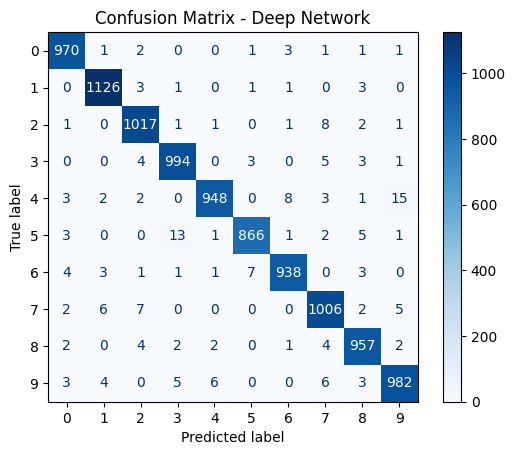

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

deep_model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = deep_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Test Accuracy (Deep Network): {accuracy:.2f}%")

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deep Network")
plt.show()
